In [1]:
# Imports
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import gc
from IPython.display import display

# Sci-kit Learn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load file
df = pd.read_csv("all_merged_sw.csv",
                 usecols=['post_id', 'date', 'num_comments', 'score', 'total_awards',
                          'author_commentkarma', 'compound_score', 'author_id', 'author_name',
                          'ticker', 'post_type', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
                          'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X', 
                          'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
                          'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
                          'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
                          'adjclose_1_X', 'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                          'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y',
                          'adjclose_9_Y', 'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y',
                          'adjclose_13_Y', 'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                          'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y',
                          'adjclose_21_Y'])

df

,post_id,date,num_comments,score,total_awards,author_commentkarma,compound_score,author_id,author_name,ticker,...,adjclose_12_Y,adjclose_13_Y,adjclose_14_Y,adjclose_15_Y,adjclose_16_Y,adjclose_17_Y,adjclose_18_Y,adjclose_19_Y,adjclose_20_Y,adjclose_21_Y
0,ed1i6xt,2019-01-01,2,9,0.0,1855.0,0.2023,a36tf,gundeck925,CONE,...,48.734329,49.016304,48.236179,46.995499,47.221077,46.967300,49.223080,49.345276,50.144196,50.943123
1,ed0rsq9,2019-01-01,1,3,0.0,8101.0,0.4588,54sdn,turbotoast,CACC,...,421.739990,429.119995,424.959991,420.950012,405.570007,409.929993,411.890015,408.670013,414.369995,398.019989
2,ed149cc,2019-01-01,2,6,0.0,234162.0,-0.5106,6lvmmbl,Shmokesshweed,WSBC,...,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271
3,ed0rg2j,2019-01-01,9,6,0.0,744.0,0.3612,2dk1wq99,nightman_123,WSBC,...,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271
4,abjmvm,2019-01-01,34,10,0.0,744.0,-0.8442,2dk1wq99,nightman_123,WSBC,...,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940780,ghmym1x,2020-12-31,1,8,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,ADES,...,5.420000,5.450000,5.330000,5.380000,5.440000,5.500000,5.250000,5.190000,5.070000,5.120000
940781,ghmym1x,2020-12-31,1,8,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,JAN,...,5.530000,5.800000,5.650000,5.520000,5.230000,6.450000,9.520000,12.990000,9.010000,9.400000
940782,ghmynsf,2020-12-31,1,10,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,FEYE,...,22.190001,22.400000,22.600000,22.639999,22.100000,21.660000,21.360001,21.150000,21.000000,21.590000
940783,ghmiiu6,2020-12-31,0,4,0.0,22288.0,-0.3875,bgruy,DeadSol,WSBC,...,31.354565,31.205917,30.700518,31.364473,31.255468,30.720339,28.926668,29.550983,28.738380,29.313148


In [3]:
# Print the colum names
df.columns.values

array(['post_id', 'date', 'num_comments', 'score', 'total_awards',
       'author_commentkarma', 'compound_score', 'author_id',
       'author_name', 'ticker', 'post_type', 'adjclose_20_X',
       'adjclose_19_X', 'adjclose_18_X', 'adjclose_17_X', 'adjclose_16_X',
       'adjclose_15_X', 'adjclose_14_X', 'adjclose_13_X', 'adjclose_12_X',
       'adjclose_11_X', 'adjclose_10_X', 'adjclose_9_X', 'adjclose_8_X',
       'adjclose_7_X', 'adjclose_6_X', 'adjclose_5_X', 'adjclose_4_X',
       'adjclose_3_X', 'adjclose_2_X', 'adjclose_1_X', 'adjclose_2_Y',
       'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y', 'adjclose_6_Y',
       'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
       'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y', 'adjclose_14_Y',
       'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y', 'adjclose_18_Y',
       'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y'], dtype=object)

In [4]:
# Find the min and max at 1-4 business week intervals
df['5day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmin(axis=1)

df['10day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmin(axis=1)

df['15day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmin(axis=1)

df['20day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmin(axis=1)

df['5day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmax(axis=1)

df['10day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmax(axis=1)

df['15day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmax(axis=1)

df['20day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmax(axis=1)

# Extract the day number and convert to int
df['5day_min'] = df['5day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_min'] = df['10day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_min'] = df['15day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_min'] = df['20day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['5day_max'] = df['5day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_max'] = df['10day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_max'] = df['15day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_max'] = df['20day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)

In [5]:
# Get the X-variable columns
df_X = df[['num_comments', 'score', 'total_awards', 'author_commentkarma',
           'compound_score', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
           'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
           'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
           'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
           'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
           'adjclose_1_X']].to_numpy()

# Get the Y-variable columns
df_Y = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y',
           'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y',
           'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
           'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y',
           'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
           '5day_min', '10day_min', '15day_min', '20day_min', '5day_max',
           '10day_max', '15day_max', '20day_max']].to_numpy()

# Clear up memory
del df
gc.collect()

# Get 80% of the data by date
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,
                                                    shuffle=False)

# Print
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[  2.           9.           0.         ...  52.13834381  51.69112778
   50.32151794]
 [  1.           3.           0.         ... 418.19000244 423.57000732
  424.11999512]
 [  2.           6.           0.         ...  37.21271133  37.09537888
   36.59896469]
 ...
 [  1.          22.           0.         ... 128.88563538 127.82733154
  128.85595703]
 [ 51.         115.           3.         ...  21.10000038  21.59000015
   24.35000038]
 [ 51.         115.           3.         ...   7.1500001    7.07999992
    6.69999981]]
[[ 0.          8.          0.         ...  4.40999985  4.36000013
   4.3499999 ]
 [ 1.         10.          0.         ... 21.76743317 22.11540222
  21.88342476]
 [ 0.          3.          0.         ...  2.04999995  2.05999994
   2.1099999 ]
 ...
 [ 1.         10.          0.         ... 14.81000042 14.27000046
  13.63000011]
 [ 0.          4.          0.         ... 22.61213112 24.74979019
  24.33794785]
 [ 1.          3.          0.         ...  6.          6.61999

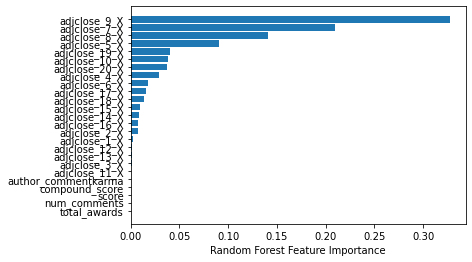

In [6]:
# Initialize Model
RFRegressor = RandomForestRegressor(bootstrap=False, criterion='mse',
                                    max_depth=6, max_leaf_nodes=None, max_features=0.33,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    n_estimators=400, n_jobs=None, oob_score=False,
                                    random_state=1, verbose=0, warm_start=False) 

# Train
RFRegressor.fit(X_train,y_train)

# Feature importance
cols = ['num_comments', 'score', 'total_awards', 'author_commentkarma',
        'compound_score', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
        'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
        'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
        'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
        'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
        'adjclose_1_X']
sorted_idx = RFRegressor.feature_importances_.argsort()
plt.barh([cols[i] for i in sorted_idx], RFRegressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Predict
ypred = RFRegressor.predict(X_test)

In [7]:
# Evaluate RMSE
rmse = mean_squared_error(y_test, ypred, multioutput='raw_values', squared=False)

# For each value in rmse
for i in range(1, len(rmse)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The RMSE for adjClose_{}_Y = ".format(i+1), rmse[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The RMSE for {}day_min = ".format((i-20)*5), rmse[i-1])

    # Print the RMSE for max day
    else:
        print("The RMSE for {}day_max = ".format((i-24)*5), rmse[i-1])

The RMSE for adjClose_2_Y =  39.12346805869825
The RMSE for adjClose_3_Y =  39.016132027177925
The RMSE for adjClose_4_Y =  40.608827545529635
The RMSE for adjClose_5_Y =  42.13654088414143
The RMSE for adjClose_6_Y =  44.068916228085136
The RMSE for adjClose_7_Y =  45.58319804493145
The RMSE for adjClose_8_Y =  47.17473450655344
The RMSE for adjClose_9_Y =  50.01396276816003
The RMSE for adjClose_10_Y =  50.44859557921197
The RMSE for adjClose_11_Y =  52.392196376775054
The RMSE for adjClose_12_Y =  54.40851819491097
The RMSE for adjClose_13_Y =  57.19042875016065
The RMSE for adjClose_14_Y =  58.11301861663637
The RMSE for adjClose_15_Y =  60.92593138956683
The RMSE for adjClose_16_Y =  61.76050774711949
The RMSE for adjClose_17_Y =  62.90607486623053
The RMSE for adjClose_18_Y =  64.14921372646197
The RMSE for adjClose_19_Y =  65.10751318578136
The RMSE for adjClose_20_Y =  65.936136384897
The RMSE for adjClose_21_Y =  66.96595941136081
The RMSE for 5day_min =  1.5523883364475541
Th

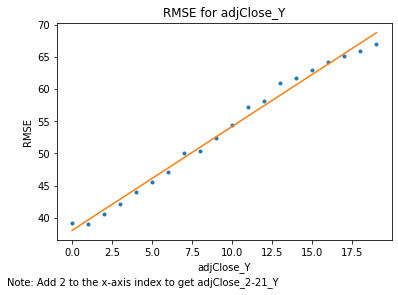

In [8]:
# Plot the RMSE for adjClose
x = np.arange(20)
y = rmse[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('RMSE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

In [9]:
# Evaluate MAE
mae = mean_absolute_error(y_test, ypred, multioutput='raw_values')

# For each value in rmse
for i in range(1, len(mae)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The MAE for adjClose_{}_Y = ".format(i+1), mae[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The MAE for {}day_min = ".format((i-20)*5), mae[i-1])

    # Print the RMSE for max day
    else:
        print("The MAE for {}day_max = ".format((i-24)*5), mae[i-1])

The MAE for adjClose_2_Y =  14.873432068802543
The MAE for adjClose_3_Y =  14.860000336018544
The MAE for adjClose_4_Y =  15.27178998680889
The MAE for adjClose_5_Y =  15.635039644900502
The MAE for adjClose_6_Y =  16.1752354341306
The MAE for adjClose_7_Y =  16.72975280573505
The MAE for adjClose_8_Y =  17.108750026776967
The MAE for adjClose_9_Y =  17.78855490579675
The MAE for adjClose_10_Y =  18.038509648144903
The MAE for adjClose_11_Y =  18.619242175887596
The MAE for adjClose_12_Y =  19.05561051643633
The MAE for adjClose_13_Y =  19.793453215259532
The MAE for adjClose_14_Y =  20.186072637401082
The MAE for adjClose_15_Y =  21.12580645971582
The MAE for adjClose_16_Y =  21.436040905933393
The MAE for adjClose_17_Y =  21.826143010338114
The MAE for adjClose_18_Y =  22.20463000660606
The MAE for adjClose_19_Y =  22.444846223145834
The MAE for adjClose_20_Y =  22.698644994759068
The MAE for adjClose_21_Y =  22.961641634736704
The MAE for 5day_min =  1.3856192423406815
The MAE for 1

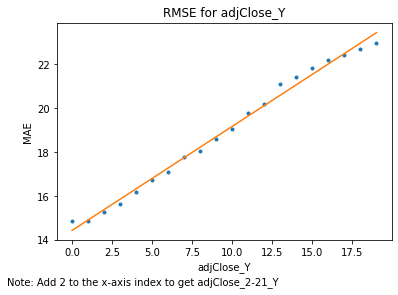

In [10]:
# Plot the MAE for adjClose
x = np.arange(20)
y = mae[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('MAE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

# Get last 20% of rows
tail = df.tail(188157)

# Reset index
tail.reset_index(drop=True, inplace=True)

# Merge predictions with original data frame
df = pd.concat([tail, pd.DataFrame(ypred)], axis=1, ignore_index=True)

# Rename columns
df.columns = ['post_id', 'date', 'num_comments', 'score', 'total_awards',
              'author_commentkarma', 'compound_score', 'author_id', 'author_name',
              'ticker', 'post_type', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
              'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
              'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
              'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
              'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
              'adjclose_1_X', 'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
              'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y',
              'adjclose_9_Y', 'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y',
              'adjclose_13_Y', 'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
              'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y',
              'adjclose_21_Y', 'pred_adjClose_2_Y', 'pred_adjClose_3_Y',
              'pred_adjClose_4_Y', 'pred_adjClose_5_Y', 'pred_adjClose_6_Y',
              'pred_adjClose_7_Y', 'pred_adjClose_8_Y', 'pred_adjClose_9_Y',
              'pred_adjClose_10_Y', 'pred_adjClose_11_Y', 'pred_adjClose_12_Y',
              'pred_adjClose_13_Y', 'pred_adjClose_14_Y', 'pred_adjClose_15_Y',
              'pred_adjClose_16_Y', 'pred_adjClose_17_Y', 'pred_adjClose_18_Y',
              'pred_adjClose_19_Y', 'pred_adjClose_20_Y', 'pred_adjClose_21_Y',
              'pred_5day_min', 'pred_10day_min', 'pred_15day_min', 'pred_20day_min',
              'pred_5day_max', 'pred_10day_max', 'pred_15day_max', 'pred_20day_max']

df

df.to_csv("red_fin_preds.csv", index=False)